# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

## Importing the dataset and relevant packages

In [1]:
# importing relevant packages/functions
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st 

# setting style of graphs 
sns.set()

# Importing the dataset 
df = pd.read_csv('data/human_body_temperature.csv')

Before we begin answering any questions its always a good idea to check that the data was imported correctly and get an idea of what columns we will be working with. 

In [2]:
# Viewing the first few rows of the data 
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


We see from above that our dataset is composed of just three columns:
1. temperature - a measure of the human body temperature in Farenheit
2. gender - the gender of each participant
3. heart_rate - the number of hear bears per minute of each participant

Next, let's do a quick check for null values in all the columns. 

In [3]:
# checking for the number of null values in the numerical columns
pd.isnull(df).sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

Finally, lets do a quick check of what categories exist in the gender column. 

F    65
M    65
Name: gender, dtype: int64

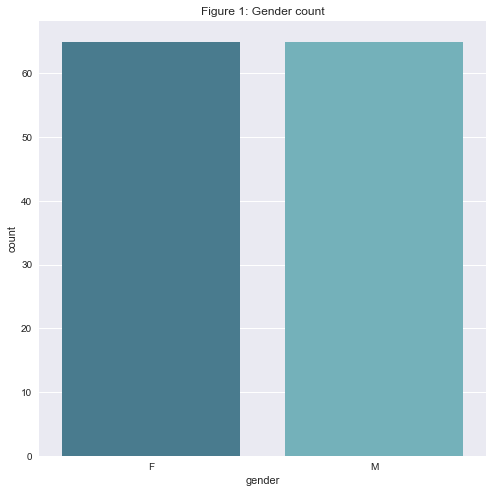

In [4]:
# checking the categories and counts in the gender column using a bar chart 
plt.figure(figsize = (8,8))
plt.title('Figure 1: Gender count')
sns.countplot(x = 'gender', data=df, palette='GnBu_d')

# showing the gender count
df.gender.value_counts()

The data set contains an equal number of males and females. Now that we are aware of these details, we can begin answering the above questions. 

## Question 1: Is the distribution of body temperatures normal?
In order to determine whether the distribution of body temperatures is normal a [normal probability plot](https://en.wikipedia.org/wiki/Normal_probability_plot) will be made. The code for this is below:

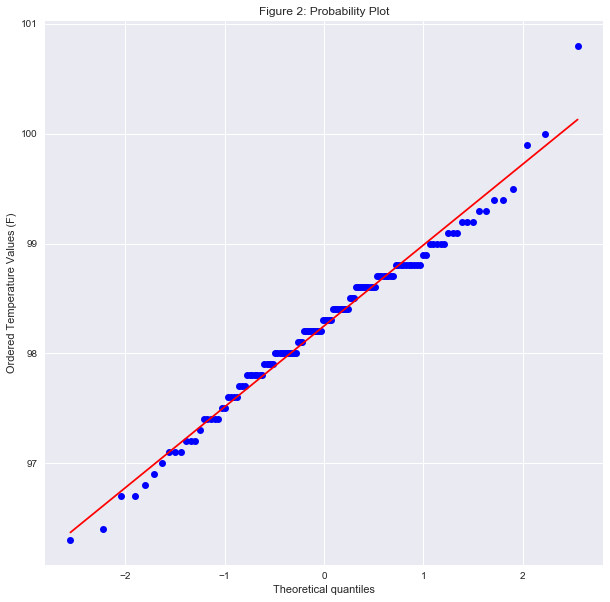

Correlation coefficient:0.991572003659


In [5]:
# creating a normal probability plot 
plt.figure(figsize=(10,10))
arrays, regression_line = st.probplot(df.temperature, plot=plt)
plt.ylabel('Ordered Temperature Values (F)')
plt.title('Figure 2: Probability Plot')
plt.show()


# printing the coefficient of determination
slope, intercept, r = regression_line
print('Correlation coefficient:' + str(r))

Visually, the probability plot shows a strongly linear pattern. This is verified by the correlation coefficient (0.9915) of the line fit to the probability plot. The fact that a point in the upper extreme of the plot deviates significantly from the straight-line pattern indicates that there may be at least one outlier (relative to a normal distribution). Nevertheless, we can quite reasonably conclude that the normal distribution provides an excellent model for the data. 

## Question 2: Is the sample size large? Are the observations independent?

To answer the first question, let's start by checking the size of the number of observations in the dataset.

In [6]:
# printing the number of observations in the dataset
print('The number of observations in the dataset: '  + str(len(df)))

The number of observations in the dataset: 130


From above we see that there are a total of 160 observations in the dataset. As we are aware that the Central Limit theorem only requires 30 observations, we can conclude that the sample size is sufficient for our purposes. 

There is no information provided to outrightly determine that the observations are independent. However, it is unlikely that one participants body temperature or heart rate will be affected by anothers. This makes it reasonable to claim the observations are independent.

## Question 3: Is the true population mean really 98.6 degrees F?
A variety of methods will be used to determine whether the population mean is likely 98.6 F

### 1. Bootstrap Hypothesis Test
The null and alternative hypotheses are shown below:
* H<sub>0</sub> : $\mu$ = 98.6F
* H<sub>1</sub> : $\mu\neq$ 98.6F

To test the above hypothesis, we shall construct an array of 50,000 bootstrap replicates and calculate the p-value. The construction of the bootstrap replicates array is shown below.

In [7]:
# creating empty array for bootstrap replicates
size = 50000
bootstrap_replicates = np.empty(size)

# calculating shifted temperature values
shift_temp = df.temperature - df.temperature.mean() + 98.6

# filling the bootstrap replicates array
for i in range(size):
    bootstrap_sample = np.random.choice(shift_temp, size=len(shift_temp))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)


To determine how we calculate the p-value, we need to know the sample mean of the dataset.

In [8]:
print('The mean of the temperature observations: ' + str(df.temperature.mean()))

The mean of the temperature observations: 98.2492307692


Since the mean temperature observation in our dataset is less than the population mean in the null hypothesis, the p-value will be calculated as the fraction of bootstrap samples less than or equal to 98.2.

In [9]:
p = np.sum(bootstrap_replicates <= df['temperature'].mean()) / len(bootstrap_replicates)
print('p =', p)

p = 0.0


A p-value of 0 suggests that the dataset is statistically different from one that would have a mean population body temperature of 98.6F. Consequently, we reject the null hypothesis. 

### 2. Frequentist Statistical Tests

The null and alternative hypotheses remain the same as before:
* H<sub>0</sub> : $\mu$ = 98.6F
* H<sub>1</sub> : $\mu\neq$ 98.6F

#### The Z- Test
We use a one sample and two-tail Z-test for the following reasons:
1. We are only testing for whether the mean population is 98.6F
2. The sample size (130) is larger than 30 and so the Central Limit theorem can be applied. 

A 5% significance level will be used. Let's compute the p-value and compare it to the significance level.

In [10]:
# calculating the z-score
Z_score = (df.temperature.mean() - 98.6)/(df.temperature.std()/ np.sqrt(len(df)))

# calculating the p-value
p_value = st.norm.cdf(Z_score)

# defining significance level
sig_level = 0.05/2

# check what to print (only works since we know we need to compare results to lower tail)
if p_value < sig_level:
    print('The p-value (' + str(p_value) + ') is less than 0.025')
else:
    print('The p-value (' + str(p_value) + ') is greater than 0.025')

The p-value (2.45107850705e-08) is less than 0.025


Based on the above result, we reject the null hypothesis as results once again suggest that the mean population body temperature is not 98.6F. 

#### The t-Test
Finally we compute the results for the t-test below

In [11]:
# calculating the p-value
p_value_t = st.t.cdf(Z_score, df=len(df)-1)

# defining significance level
sig_level = 0.05/2

# check what to print (only works since we know we need to compare results to lower tail)
if p_value_t < sig_level:
    print('The p-value (' + str(p_value_t) + ') is less than 0.025')
else:
    print('The p-value (' + str(p_value_t) + ') is greater than 0.025')

The p-value (1.20531602078e-07) is less than 0.025


As before the results are the same as it suggests we reject the null hypothesis. The only difference in the comparison lies in the fact that the p-value for the t-test is greater than that for the z-test.  

### Question 4: Draw a small sample of size 10 and repeat frequentist tests

In [12]:
# drawing a small sample
small_sample = np.random.choice(df.temperature, size=10)

# calcalating z-score
Z_score = (small_sample.mean() - 98.6)/(small_sample.std()/ np.sqrt(10))

# Z-TEST
# calculating the p-value
p_value = st.norm.cdf(Z_score)

# defining significance level
sig_level = 0.05/2

# check what to print (only works since we know we need to compare results to lower tail)
if p_value < sig_level:
    print('Z-test: The p-value (' + str(p_value) + ') is less than 0.025')
else:
    print('Z-test: The p-value (' + str(p_value) + ') is greater than 0.025')

# t-TEST
# calculating the p-value
p_value_t = st.t.cdf(Z_score, df=10-1)

# check what to print (only works since we know we need to compare results to lower tail)
if p_value_t < sig_level:
    print('t-test: The p-value (' + str(p_value_t) + ') is less than 0.025')
else:
    print('t-test: The p-value (' + str(p_value_t) + ') is greater than 0.025')

Z-test: The p-value (0.00295104538049) is less than 0.025
t-test: The p-value (0.0111802469985) is less than 0.025


We see from the above code that using a small sample of 10, the z-test suggests the null hypothesis is true while the t-test suggests we reject the null hypothesis. This result indicates that the t-test is better for small sample sizes. 

### Question 5: What temperatures should we consider abnormal?
We consider abnormal temperatures to be those outside the 95% confidence interval of our temperature data.

In [13]:
# calculating the 95% confidence interval
lower_limit, upper_limit = st.norm.interval(0.95, loc = df.temperature.mean(), scale=st.sem(df.temperature))
print('Lower bound: ' + str(lower_limit))
print('Upper bound: ' + str(upper_limit))

Lower bound: 98.1231964282
Upper bound: 98.3752651103


The confidence interval above suggests that temperatures below 98.12F and above 98.38F should be considered abnormal. 

### Question 6: Is there a significant difference between males and females in the normal temperature
To answer this question a hypothesis test will be used:
1. A z-test is chosen since both the number of males and females are greater than 30.
2. A two tailed test is chosen since we are testing for whether or not there is a difference in male and female normal temperature

The null and alternative hypotheses are shown below:
* H<sub>0</sub> : $\mu$<sub>M</sub> - $\mu$<sub>F</sub> = 0
* H<sub>1</sub> : $\mu$<sub>M</sub> - $\mu$<sub>F</sub> $\neq$ 0

The p-value is calculated below:

In [14]:
# Selecting males and femalesin normal temperature
normal_male = df[(df.gender == 'M') & (df.temperature>= lower_limit) 
                 & (df.temperature <= upper_limit)].temperature
normal_female  = df[(df.gender == 'F') & (df.temperature>= lower_limit) 
                 & (df.temperature <= upper_limit)].temperature

# calculating z-score
Z_score = (normal_male.mean() - normal_female.mean())/np.sqrt(((st.sem(normal_male))**2) + ((st.sem(normal_female))**2))

# calculating the p-value
p_value = st.norm.cdf(Z_score)

# defining significance level
sig_level = 0.05/2

# check what to print (only works since we know we need to compare results to lower tail)
if p_value < sig_level:
    print('Z-test: The p-value (' + str(p_value) + ') is less than 0.025')
else:
    print('Z-test: The p-value (' + str(p_value) + ') is greater than 0.025')

Z-test: The p-value (0.5) is greater than 0.025


A p-value of 0.5 suggests that there is no statistical difference between males and females in the normal body temperature range. Consequently, we do not reject the null hypothesis.